# 네이버 리뷰 크롤링
- `.getText()`: 하위 태그를 제거하고 유니코드 텍스트 문자열만 반환
- `.text`: 하위 태그의 텍스트까지 문자열로 반환
- `.string`: 태그 하위 문자열을 객체화

In [145]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import re
from tqdm import tqdm
import time
from datetime import date

# base url
url = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=163834&type=after&onlyActualPointYn=N&onlySpoilerPointYn=N&order=newest&page='

# 정규표현식
regex = re.compile('.*_filtered_ment_.*')

# 페이지 반복
ls_comments = []
for p in tqdm(range(1, 419), desc='crawling...'):
    time.sleep(0.5)
    
    p_url = url + str(p)
    html = requests.get(p_url)
    soup = bs(html.content, 'html.parser')
    
    stars = soup.find_all('div', class_='star_score')
    div = soup.find_all('div', class_='score_reple')

    # 댓글 추출
    for s, d in zip(stars, div):
        score = s.find('em').text
        
        dt = d.select('dt > em')[-1].text[:10]
        year = int(dt[:4])
        month = int(dt[5:7])
        day = int(dt[8:10])
        dates = date(year, month, day)
        
        r = d.find('span', {'id':regex})
        try:
            comment = r.find('a')['data-src']
        except:
            comment = re.sub('[\r\n\t]', '', r.text)
            
        ls_comments.append([dates, int(score), comment])

crawling...: 100%|███████████████████████████████████████████████████████████████████| 418/418 [04:24<00:00,  1.58it/s]


In [146]:
# 데이터 프레임 변환
df = pd.DataFrame(ls_comments, columns=['날짜', '점수', '댓글'])
df.head()

,날짜,점수,댓글
0,2021-01-19,4,탁당이 More More하면서 원더우먼과 대치할때 수어사이드 스쿼드의 엉덩이 춤의 ...
1,2021-01-19,1,DC가 DC했다.
2,2021-01-19,1,"원더 우먼이라는 캐릭터 자체가 별다른 매력없이 소비되고, 흥미롭게 시작하는 첫부분은..."
3,2021-01-19,10,오락영화가 이정도면 괜찮을듯한데... 스토리도 괜찮았음. 갤가돗은 예뻤고.. 마블...
4,2021-01-19,1,진짜 보다가 잤음 노젬 돈 아까움


In [148]:
# 파일 저장
df.to_excel('./py_data/crawling/원더우먼_리뷰.xlsx', index=False, encoding='euc-kr', engine='openpyxl')

# 형태소 분석

In [179]:
import pandas as pd

df = pd.read_excel('./py_data/crawling/원더우먼_리뷰.xlsx', engine='openpyxl')

txt = ''
for i, r in df.iterrows():
    try:
        txt += r[2]
        txt += '\n'
    except:
        continue

In [197]:
txt.count('겔 가돗')

9

In [193]:
txt

'탁당이 More More하면서 원더우먼과 대치할때 수어사이드 스쿼드의 엉덩이 춤의 악몽이 떠오르더군요. DC는 대본과 연출이 마블대비 고루한 것 같아요. 보통 미드의 작가진은 탄탄하던데 DC영화 작가진은 어설픈것 같아 안타깝습니다. 수어사이드 스쿼드, 샤잠...저스티스리그는 조금 낫긴했는데...아쉽게도 마블과 너무 대비되네요. 재미있는 DC 영화가 나오길 아직 기다려봅니다. \nDC가 DC했다. \n원더 우먼이라는 캐릭터 자체가 별다른 매력없이 소비되고, 흥미롭게 시작하는 첫부분은 영화와는 전혀 무관한 별개의 스토리로 흘러간다. 말로 설득되는 시시한 악당 한명과 이빨승부를 하는 원더우먼, 뜬금없는 호랭인간...모든면에서 부족하고 흥미롭지 않은 유아용영화 \n오락영화가 이정도면 괜찮을듯한데... 스토리도 괜찮았음.  갤가돗은 예뻤고.. 마블기준으로 가오갤이나 토르3 윈터솔져보다는 많이 안좋지만... 캡틴마블이나 블랙팬서보다는 낫다는 생각이 들던데... \n진짜 보다가 잤음 노젬 돈 아까움 \n전 개인적으로 재밌게 봤습니다 1편보고 바로 보면 이해가 빠릅니다 \n초반에 원더우먼 고향씬만 좀 흥미진진하고 바로 지루해짐... 영화관에서 잔 적이 딱 2번인데 1번은 인터스텔라(이건 내가 빡대갈이라 이해를 못함) 다른 1번은 바로 이 영화 \n와...오.... 3번에걸쳐 겨우 끝까지 봤는데...내가 체력이 딸려서 졸린줄... 아직안봤으면 앵간하면 딴거보샘 \n움... 저에겐 안맞았던걸로.. \n갤 가돗의 원더우먼을 볼 수 있어서 넘 좋았습니다! 미국의 현 사태를 오마주하는 스토리가 정말 놀랍네요. 선과 악의 대결속에 선이 이기고 진실이 밝혀지길 기도합니다. Wonder Woman Forever♡ \n걍 기집년나와서 뭐하는것 같아보이니 평점 높은거보소 ㅋㅋ진짜 전작보다 퇴보한 쓰레기 영화임ㅋㅋ \n첫5분 전율 그자체ㅠ 영상, 액션 완전 훌륭했어요소~~~름 돋는 액션 \n캐비어로 맛대가리 없는 알탕을 끓였다DC는 반성해라저렇게 매력있는 캐릭터들로 C급 영화를 만드냐.능력이

In [223]:
from ckonlpy.tag import Twitter, Postprocessor

twitter = Twitter()
twitter.add_dictionary(['수어사이드스쿼드', '블랙팬서', '갤가돗', '갤 가돗', '개연성', '키스씬'], 'Noun')

stopwords = {'면서', '어요', '까지', '이건', '어서', '보지', '인지'}
replace = {'겔 가돗' : '갤가돗', '갤 가돗' : '갤가돗', '겔가돗' : '갤가돗'}
postprocessor = Postprocessor(twitter, replace = replace, stopwords = stopwords)

ls_pos = postprocessor.pos(txt)

C:\Users\dojun\anaconda3\envs\python38\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [224]:
ls_pos[:5]

[('탁', 'Noun'),
 ('당', 'Suffix'),
 ('이', 'Josa'),
 ('More', 'Alpha'),
 ('More', 'Alpha')]

In [225]:
ls_noun = []

for word, pos in ls_pos:
    if (len(word) > 1) & (pos == 'Noun'):
        ls_noun.append(word)

In [226]:
print(len(ls_noun))
ls_noun[:10]

35857


['원더우먼', '대치', '수어', '사이드', '스쿼드', '엉덩이', '악몽', '대본', '연출', '마블']

In [227]:
from collections import Counter

counts = Counter(ls_noun)

# WordCloud

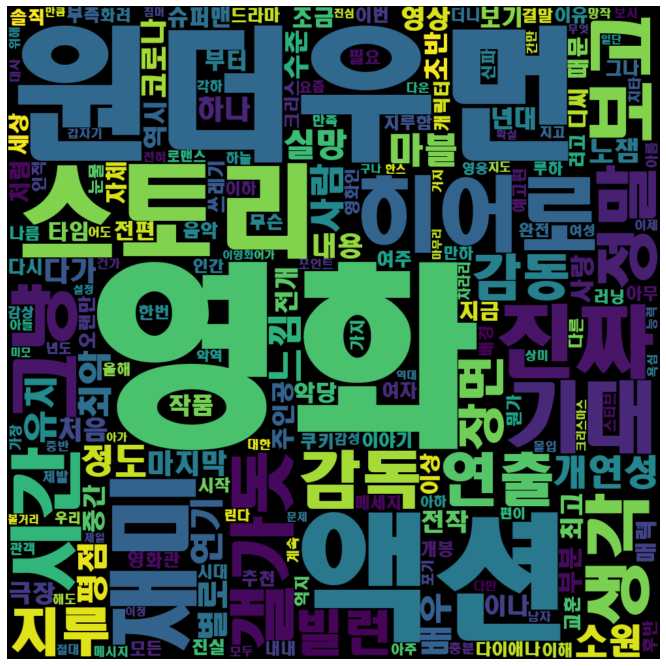

In [229]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\HMKMRHD.TTF',
                     background_color = 'black',
                     width = 1000,
                     height = 1000,
                     max_font_size = 300)

img = wordcloud.generate_from_frequencies(counts)

plt.figure(figsize = (12, 12))
plt.imshow(img, interpolation = 'bilinear')
plt.axis('off')

plt.savefig('./py_data/wordcloud/원더우먼_워드클라우드.jpg')
plt.show()

In [235]:
counts = Counter(ls_noun)
counts_sorted = counts.most_common()

In [236]:
counts_sorted

[('영화', 1663),
 ('원더우먼', 757),
 ('액션', 686),
 ('스토리', 585),
 ('재미', 483),
 ('히어로', 381),
 ('진짜', 376),
 ('기대', 337),
 ('시간', 316),
 ('그냥', 279),
 ('갤가돗', 262),
 ('생각', 259),
 ('보고', 247),
 ('정말', 230),
 ('감독', 227),
 ('연출', 192),
 ('지루', 185),
 ('감동', 183),
 ('빌런', 183),
 ('장면', 175),
 ('개연성', 175),
 ('마블', 174),
 ('사람', 170),
 ('느낌', 169),
 ('최악', 169),
 ('유치', 161),
 ('소원', 160),
 ('연기', 158),
 ('정도', 156),
 ('배우', 140),
 ('실망', 140),
 ('평점', 139),
 ('별로', 132),
 ('마지막', 130),
 ('다가', 127),
 ('하나', 124),
 ('코로나', 122),
 ('노잼', 116),
 ('내용', 115),
 ('처음', 112),
 ('수준', 111),
 ('영상', 104),
 ('초반', 102),
 ('전작', 99),
 ('부분', 98),
 ('역시', 97),
 ('최고', 97),
 ('중간', 95),
 ('전개', 93),
 ('사랑', 92),
 ('주인공', 88),
 ('년대', 86),
 ('극장', 86),
 ('작품', 82),
 ('이나', 81),
 ('슈퍼맨', 80),
 ('조금', 78),
 ('처럼', 77),
 ('자체', 75),
 ('부터', 75),
 ('때문', 75),
 ('매력', 74),
 ('악당', 74),
 ('보기', 74),
 ('타임', 73),
 ('전편', 73),
 ('지금', 72),
 ('세상', 72),
 ('이상', 72),
 ('디씨', 70),
 ('영화관', 69),
 ('쓰레기', 67),
 ('교훈', 

In [237]:
df_count = pd.DataFrame(counts_sorted, columns = ['단어', '빈도수'])
df_count

,단어,빈도수
0,영화,1663
1,원더우먼,757
2,액션,686
3,스토리,585
4,재미,483
...,...,...
5261,고서,1
5262,와일드캣,1
5263,수확,1
5264,냄새,1


In [238]:
df_count.to_csv('./py_data/wordcloud/원더우먼_단어빈도수.csv', index=False, encoding = 'euc-kr')

In [240]:
df_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5266 entries, 0 to 5265
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   단어      5266 non-null   object
 1   빈도수     5266 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 82.4+ KB


In [243]:
df= df_count.astype({'빈도수':'int32'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5266 entries, 0 to 5265
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   단어      5266 non-null   object
 1   빈도수     5266 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 61.8+ KB


# Groupby

In [246]:
import pandas as pd

df = pd.read_excel('./py_data/crawling/원더우먼_리뷰.xlsx', engine = 'openpyxl')
df.head()

,날짜,점수,댓글
0,2021-01-19,4,탁당이 More More하면서 원더우먼과 대치할때 수어사이드 스쿼드의 엉덩이 춤의 ...
1,2021-01-19,1,DC가 DC했다.
2,2021-01-19,1,"원더 우먼이라는 캐릭터 자체가 별다른 매력없이 소비되고, 흥미롭게 시작하는 첫부분은..."
3,2021-01-19,10,오락영화가 이정도면 괜찮을듯한데... 스토리도 괜찮았음. 갤가돗은 예뻤고.. 마블...
4,2021-01-19,1,진짜 보다가 잤음 노젬 돈 아까움


In [251]:
df_mean = df.groupby('날짜').mean()
df_mean.head(10)

,점수
날짜,
2019-10-10,10.000000
2019-10-12,10.000000
2019-10-18,10.000000
2020-12-23,6.925234
2020-12-24,6.294294
2020-12-25,5.464037
2020-12-26,5.583120
2020-12-27,5.262500
2020-12-28,4.886792


In [254]:
df_mean = df_mean[3:]

# 그래프 출력

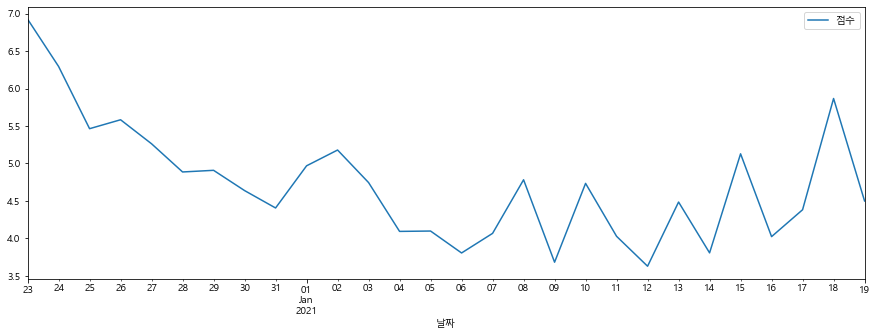

In [261]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='C:\Windows\Fonts\malgunbd.ttf').get_name()
rc('font', family = font_name)

df_mean.plot(figsize = (15, 5))
plt.savefig('./py_data/wordcloud/원더우먼_빈도그래프.jpg')
plt.show()